In [3]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [8]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [4]:
# Read in CSV
df = pd.read_csv("FinalDS.csv")

In [6]:
df.head()

,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,East,1/1/2010,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,1,NaN,NaN,NaN
1,0.145941169,East,1/8/2010,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,2,NaN,NaN,NaN
2,0.64,East,1/15/2010,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,3,NaN,NaN,NaN
3,0.003673095,East,1/22/2010,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,4,NaN,NaN,NaN
4,0.001836735,East,1/29/2010,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,5,NaN,NaN,NaN


In [7]:
df.describe()

,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000,1830.000000,0.0,0.0,0.0
mean,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978,183.500000,NaN,NaN,NaN
std,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041,105.683584,NaN,NaN,NaN
min,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000,1.000000,NaN,NaN,NaN
25%,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000,92.000000,NaN,NaN,NaN
50%,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000,183.500000,NaN,NaN,NaN
75%,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000,275.000000,NaN,NaN,NaN
max,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000,366.000000,NaN,NaN,NaN


In [9]:
df.corr()

,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE,Unnamed: 12,Unnamed: 13,Unnamed: 14
Sit,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.354741,NaN,NaN,NaN
INV,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.069823,NaN,NaN,NaN
DNG,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.041992,NaN,NaN,NaN
QNG,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.089608,NaN,NaN,NaN
HHDiffit,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,0.044946,NaN,NaN,NaN
Ft,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.571199,NaN,NaN,NaN
COT,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.307099,NaN,NaN,NaN
HHst,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.528398,NaN,NaN,NaN
TFE,-0.354741,0.069823,0.041992,0.089608,0.044946,-0.571199,0.307099,-0.528398,1.000000,NaN,NaN,NaN
Unnamed: 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
corrs = df.corr()

In [11]:
corrs

,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE,Unnamed: 12,Unnamed: 13,Unnamed: 14
Sit,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.354741,NaN,NaN,NaN
INV,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.069823,NaN,NaN,NaN
DNG,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.041992,NaN,NaN,NaN
QNG,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.089608,NaN,NaN,NaN
HHDiffit,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,0.044946,NaN,NaN,NaN
Ft,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.571199,NaN,NaN,NaN
COT,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.307099,NaN,NaN,NaN
HHst,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.528398,NaN,NaN,NaN
TFE,-0.354741,0.069823,0.041992,0.089608,0.044946,-0.571199,0.307099,-0.528398,1.000000,NaN,NaN,NaN
Unnamed: 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

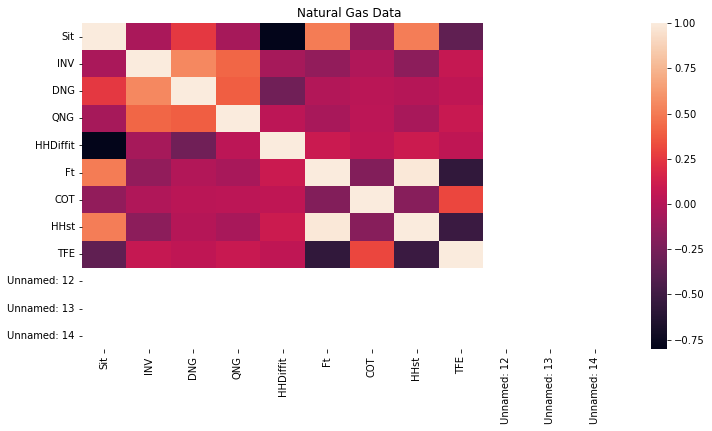

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Natural Gas Data')
plt.plot()

In [13]:
df.columns

Index(['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit',
       'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [14]:
colsnew = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [16]:
dfnew = df.loc[:, colsnew]
dfnew

,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,East,1/1/2010,7.66,769,174475.20,13475.00,-1.78,5.770,724087,5.88
1,0.145941169,East,1/8/2010,7.66,703,174475.20,13475.00,-1.10,5.818,760159,6.56
2,0.64,East,1/15/2010,7.66,642,174475.20,13475.00,-1.98,5.610,782549,5.68
3,0.003673095,East,1/22/2010,7.66,616,174475.20,13475.00,-2.10,5.625,769887,5.56
4,0.001836735,East,1/29/2010,7.66,582,174475.20,13475.00,-2.19,5.350,782673,5.47
5,0.033360439,East,2/5/2010,8.06,523,195992.00,15333.50,-2.59,5.448,775827,5.47
6,0.00095407,East,2/12/2010,8.06,471,195992.00,15333.50,-2.51,5.370,780477,5.55
7,0.003111062,East,2/19/2010,8.06,425,195992.00,15333.50,-2.65,5.228,794836,5.41
8,0.041523674,East,2/26/2010,8.06,390,195992.00,15333.50,-3.19,4.816,820300,4.87
9,9.82695E-06,East,3/5/2010,7.92,349,155059.00,16818.25,-3.18,4.664,853259,4.74


In [18]:
corrsnew = dfnew.corr()

[]

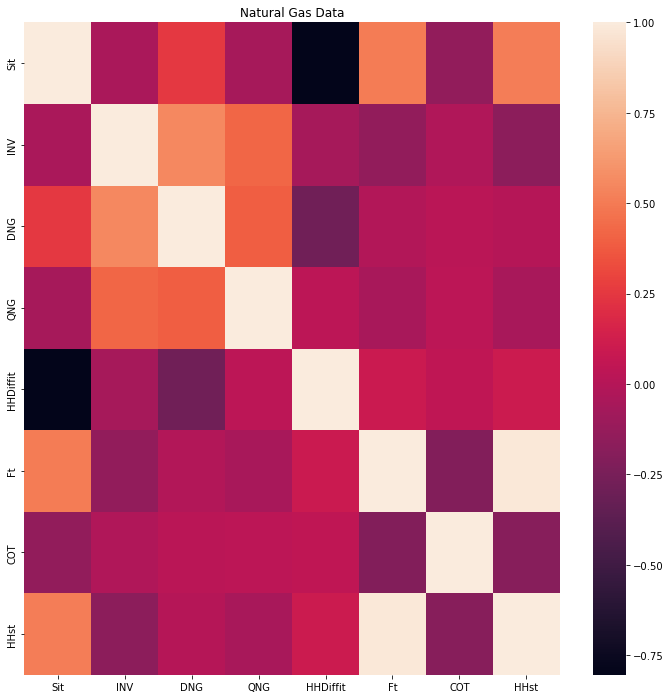

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(corrsnew)

plt.title('Natural Gas Data')
plt.plot()

TypeError: '<=' not supported between instances of 'float' and 'str'

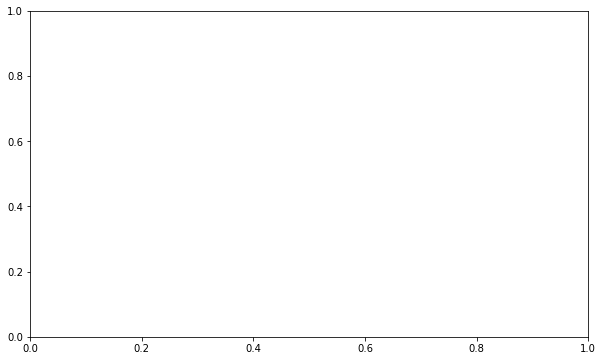

In [24]:
for col in dfnew.columns:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.show()
    print()

In [25]:
type(dfnew)

pandas.core.frame.DataFrame

In [ ]:
colsnew = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [ ]:
for col in dfnew.columns:
    
    type(dfnew[col])
    plt.title(col)
    plt.show()
    print()

TypeError: '<=' not supported between instances of 'float' and 'str'

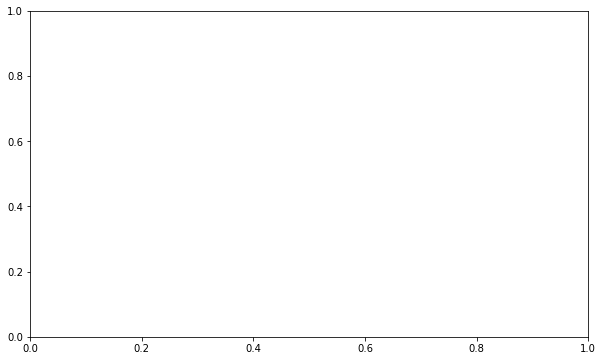

In [26]:
# To create the histograms
colsnew = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

for col in colsnew:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Ins_Preprocessing-jkeme_052922-video-review
# label encode NODE
# hOw do I handle "Date"?
# Which column(s) do I One-Hot Encode? Do I need to One-Hot Encode?
# pd.concat() to combine after breaking apart

In [27]:
# This for-loop-print looks for "string" types, prints the "columns" that are strings and the number of the different 
# categories within that column.
for col in df.columns:
    if type(dfnew[col].values[0]) == str:
        print(col)
        print(dfnew[col].nunique())
        print()

Node
5

Date
366



KeyError: 'TFE'

In [ ]:
# This for-loop-print looks for "string" types, prints the "columns" that are strings and the number of the different 
# categories within that column.
for col in df.columns:
    if type(dfnew[col].values[0]) == str:
        print(col)
        print(dfnew[col].nunique())
        print()

In [28]:
dfnew.columns

Index(['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit',
       'Ft', 'COT', 'HHst'],
      dtype='object')

In [32]:
# This for-loop-print looks for "string" types, prints the "columns" that are strings and the number of the different 
# categories within that column.
for col in df.columns:
    if type(dfnew[col].values[0]) != str:
        print(col)
        print(dfnew[col].nunique())
        print()

Volatility
1363

Sit
288

INV
867

DNG
420

QNG
396

HHDiffit
480

Ft
341

COT
366

HHst
222



KeyError: 'TFE'

In [33]:
dfnew.head(10)

,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,East,1/1/2010,7.66,769,174475.2,13475.00,-1.78,5.770,724087,5.88
1,0.145941169,East,1/8/2010,7.66,703,174475.2,13475.00,-1.10,5.818,760159,6.56
2,0.64,East,1/15/2010,7.66,642,174475.2,13475.00,-1.98,5.610,782549,5.68
3,0.003673095,East,1/22/2010,7.66,616,174475.2,13475.00,-2.10,5.625,769887,5.56
4,0.001836735,East,1/29/2010,7.66,582,174475.2,13475.00,-2.19,5.350,782673,5.47
5,0.033360439,East,2/5/2010,8.06,523,195992.0,15333.50,-2.59,5.448,775827,5.47
6,0.00095407,East,2/12/2010,8.06,471,195992.0,15333.50,-2.51,5.370,780477,5.55
7,0.003111062,East,2/19/2010,8.06,425,195992.0,15333.50,-2.65,5.228,794836,5.41
8,0.041523674,East,2/26/2010,8.06,390,195992.0,15333.50,-3.19,4.816,820300,4.87
9,9.82695E-06,East,3/5/2010,7.92,349,155059.0,16818.25,-3.18,4.664,853259,4.74


In [30]:
type(dfnew.Volatility)

pandas.core.series.Series

In [31]:
type(dfnew.Sit)

pandas.core.series.Series

In [ ]:
type(dfnew.Sit)

In [ ]:
type(dfnew.Sit)

In [ ]:
type(dfnew.Sit)

In [ ]:
type(dfnew.Sit)

In [29]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["workclass", "marital_status", "relationship", "race", "sex"]
df_oh = pd.get_dummies(df.loc[:, cols_oh], drop_first=True)
df_oh.head()

In [ ]:
# In this dataset, Label Encode, columns less than 20 categories.
cols_le = ["income", "education", 'occupation', "native-country"]
df_le = df.loc[:, cols_le].apply(lambda x: LabelEncoder().fit_transform(x))
df_le

In [ ]:
cols_num = ['age', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_num = df.loc[:, cols_num]
df_num.head()

In [ ]:
# Assists us in determining which columns we need to scale with standard scaling.
# 1)Large ranges 2) Histograms are not uniform.
for col in df_num.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()
    print()

In [ ]:
# Combine all the columns back into one dataframe
df_clean = pd.concat([df_scale, df_oh, df_le], axis=1)
df_clean.head()

In [ ]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_clean.corr()["income"]).sort_values(ascending=False)

In [ ]:
# First issue we ran into while data preparation/cleaning before model building with "TFE", Time Fixed Effects. 
# Time Fixed Effects, TFE, when included in model eliminates omitted variable bias caused by excluding unobserved features 
# that evolve over time but are constant across node/regions. The combined model allows to eliminate bias 
# from unobservables, feayures not included in the model, that change over time but are constant over 
# nodes and it controls for factors that differ across nodes but are constant over time.

In [34]:
df.columns

Index(['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit',
       'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [37]:
cols_tfe = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit','Ft', 'COT', 'HHst', 'TFE']

In [38]:
dftfe = df.loc[:, cols_tfe]
dftfe

,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE
0,NaN,East,1/1/2010,7.66,769,174475.20,13475.00,-1.78,5.770,724087,5.88,1
1,0.145941169,East,1/8/2010,7.66,703,174475.20,13475.00,-1.10,5.818,760159,6.56,2
2,0.64,East,1/15/2010,7.66,642,174475.20,13475.00,-1.98,5.610,782549,5.68,3
3,0.003673095,East,1/22/2010,7.66,616,174475.20,13475.00,-2.10,5.625,769887,5.56,4
4,0.001836735,East,1/29/2010,7.66,582,174475.20,13475.00,-2.19,5.350,782673,5.47,5
5,0.033360439,East,2/5/2010,8.06,523,195992.00,15333.50,-2.59,5.448,775827,5.47,6
6,0.00095407,East,2/12/2010,8.06,471,195992.00,15333.50,-2.51,5.370,780477,5.55,7
7,0.003111062,East,2/19/2010,8.06,425,195992.00,15333.50,-2.65,5.228,794836,5.41,8
8,0.041523674,East,2/26/2010,8.06,390,195992.00,15333.50,-3.19,4.816,820300,4.87,9
9,9.82695E-06,East,3/5/2010,7.92,349,155059.00,16818.25,-3.18,4.664,853259,4.74,10


In [39]:
corrstfe = dftfe.corr()

In [40]:
corrstfe

,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE
Sit,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.354741
INV,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.069823
DNG,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.041992
QNG,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.089608
HHDiffit,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,0.044946
Ft,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.571199
COT,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.307099
HHst,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.528398
TFE,-0.354741,0.069823,0.041992,0.089608,0.044946,-0.571199,0.307099,-0.528398,1.000000


[]

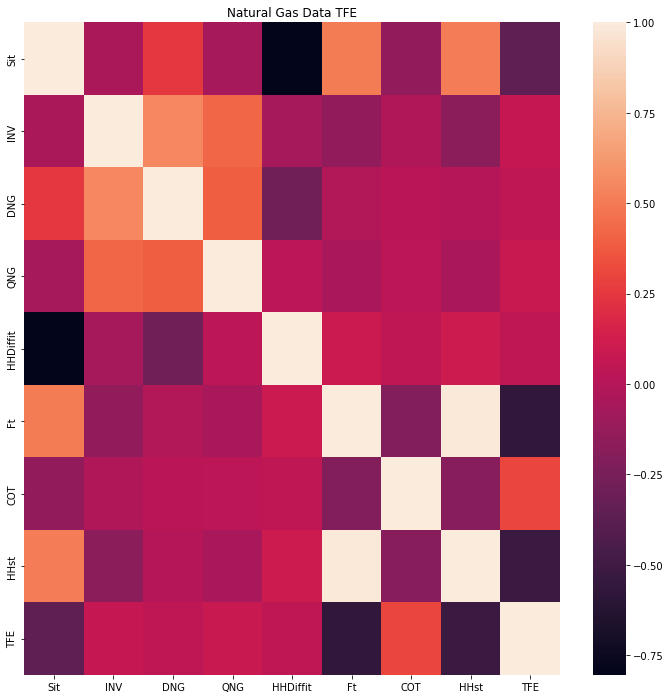

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(corrstfe)

plt.title('Natural Gas Data TFE')
plt.plot()